<a href="https://colab.research.google.com/github/mehrotrasan16/Keras-Deep-Learning/blob/master/01_keras_cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 11s 0us/step


### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


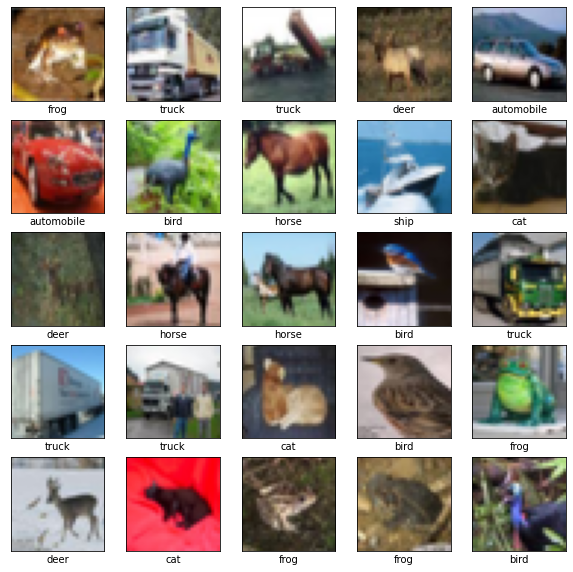

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
len(train_images),len(test_images)

(50000, 10000)

In [ ]:
len(train_images)/20

2500.0

## 68.839

### Create the model (your code goes here)

In [ ]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL
#setup model
model = keras.Sequential([
    keras.layers.Conv2D(kernel_size=3,filters=12,use_bias=False,padding='same',input_shape=(32,32,3)),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(kernel_size=6,filters=24,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(kernel_size=6,filters=32,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.4),

    keras.layers.Dense(200),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.4),
    
    keras.layers.Dense(10, activation = tf.nn.softmax)    
])

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0443 - accuracy: 0.4152 - val_loss: 1.9468 - val_accuracy: 0.5145
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9386 - accuracy: 0.5201 - val_loss: 1.9811 - val_accuracy: 0.4748
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8897 - accuracy: 0.5710 - val_loss: 1.8486 - val_accuracy: 0.6087
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8569 - accuracy: 0.6028 - val_loss: 1.9459 - val_accuracy: 0.5113
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8281 - accuracy: 0.6318 - val_loss: 1.8034 - val_accuracy: 0.6544
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8111 - accuracy: 0.6493 - val_loss: 1.7801 - val_accuracy: 0.6786
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7977 - accuracy: 0.6628 - val_loss: 1.8511 - val_accuracy:

### Evaluate the model

313/313 - 1s - loss: 1.7515 - accuracy: 0.7063


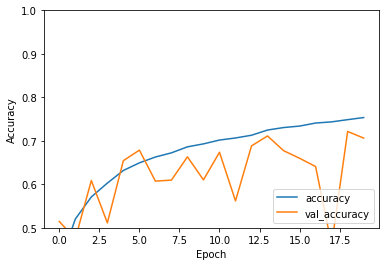

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7063000202178955


## 69.29

In [ ]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL
#setup model
model = keras.Sequential([
    keras.layers.Conv2D(kernel_size=3,filters=12,use_bias=False,padding='same',input_shape=(32,32,3)),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(kernel_size=6,filters=24,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(kernel_size=12,filters=32,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    
    # keras.layers.Conv2D(kernel_size=24,filters=32,use_bias=False,padding='same',strides=2),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    
    keras.layers.Flatten(),
    
    # keras.layers.Dense(128),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.Dropout(0.5),

    keras.layers.Dense(200),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(500),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(10, activation = tf.nn.softmax)    
])

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0628 - accuracy: 0.3918 - val_loss: 2.0334 - val_accuracy: 0.4203
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9665 - accuracy: 0.4899 - val_loss: 1.9670 - val_accuracy: 0.4907
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9158 - accuracy: 0.5423 - val_loss: 1.9355 - val_accuracy: 0.5228
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8834 - accuracy: 0.5742 - val_loss: 1.9481 - val_accuracy: 0.5094
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8623 - accuracy: 0.5957 - val_loss: 1.9254 - val_accuracy: 0.5337
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8389 - accuracy: 0.6200 - val_loss: 1.8388 - val_accuracy: 0.6183
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8246 - accuracy: 0.6347 - val_loss: 1.8450 - val_accuracy:

### Evaluate the model

313/313 - 1s - loss: 1.8010 - accuracy: 0.6587


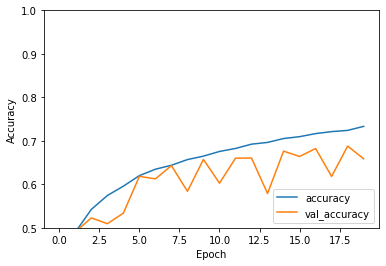

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6586999893188477


# 63.20

In [ ]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL
#setup model
model = keras.Sequential([
    keras.layers.Conv2D(kernel_size=3,filters=12,use_bias=False,padding='same',input_shape=(32,32,3)),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(kernel_size=6,filters=24,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(kernel_size=12,filters=32,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(),
    #keras.layers.Dropout(0.5),
    
    # keras.layers.Conv2D(kernel_size=24,filters=32,use_bias=False,padding='same',strides=2),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    
    keras.layers.Flatten(),
    
    # keras.layers.Dense(128),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.Dropout(0.5),

    # keras.layers.Dense(200),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.Dropout(0.5),

    keras.layers.Dense(700),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(10, activation = tf.nn.softmax)    
])

### Compile and train the model

In [ ]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0781 - accuracy: 0.3854 - val_loss: 1.9930 - val_accuracy: 0.4711
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9665 - accuracy: 0.4975 - val_loss: 1.9653 - val_accuracy: 0.4958
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9158 - accuracy: 0.5509 - val_loss: 1.9690 - val_accuracy: 0.4886
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8825 - accuracy: 0.5823 - val_loss: 1.9958 - val_accuracy: 0.4619
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8588 - accuracy: 0.6057 - val_loss: 1.8863 - val_accuracy: 0.5748
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8423 - accuracy: 0.6222 - val_loss: 1.9115 - val_accuracy: 0.5518
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8263 - accuracy: 0.6373 - val_loss: 1.8555 - val_accuracy:

### Evaluate the model

313/313 - 1s - loss: 1.8110 - accuracy: 0.6469


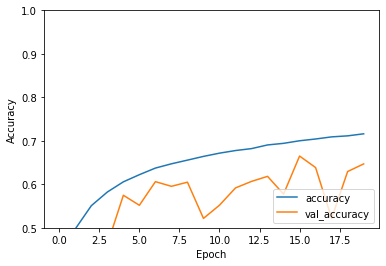

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6468999981880188


# 10

In [ ]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL
#setup model
model = keras.Sequential([
    # keras.layers.Conv2D(kernel_size=3,filters=32,use_bias=False,padding='same',input_shape=(32,32,3)),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.Conv2D(kernel_size=3,filters=32,use_bias=False,padding='same',strides=2),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.MaxPool2D(pool_size=(2, 2),padding='same'),
    # keras.layers.Dropout(0.2),
    # keras.layers.Conv2D(kernel_size=3,filters=64,use_bias=False,padding='same',strides=2),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.Conv2D(kernel_size=3,filters=64,use_bias=False,padding='same',strides=2),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.MaxPool2D(pool_size=(2, 2),padding='same'),
    # keras.layers.Dropout(0.2),
    # keras.layers.Conv2D(kernel_size=3,filters=128,use_bias=False,padding='same',strides=2),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.Conv2D(kernel_size=3,filters=128,use_bias=False,padding='same',strides=2),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.MaxPool2D(pool_size=(2, 2),padding='same'),
    # keras.layers.Dropout(0.2),
    # keras.layers.Conv2D(kernel_size=3,filters=256,use_bias=False,padding='same',strides=2),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.Conv2D(kernel_size=3,filters=256,use_bias=False,padding='same',strides=2),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.MaxPool2D(pool_size=(2, 2),padding='same'),
    # keras.layers.Dropout(0.2),

    # keras.layers.Flatten(),
    
    keras.layers.Dense(512),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(256),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(700),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(10, activation = tf.nn.softmax)    
])

### Compile and train the model

In [ ]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy', #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20


ValueError: ignored

### Evaluate the model

In [ ]:
from keras import Sequential
from keras.optimizers import SGD,Adam
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

In [ ]:
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


ValueError: ignored

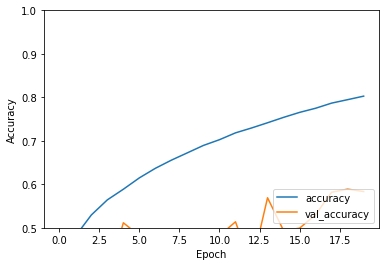

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# fit model
history = model.fit(train_images, train_labels, epochs=100, batch_size=64, validation_data=(test_images, test_labels), verbose=0)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.5834000110626221


# 10

In [ ]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL
#setup model
model = keras.Sequential([
    # keras.layers.Conv2D(kernel_size=6,filters=64,use_bias=False,padding='same',input_shape=(32,32,3)),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    #keras.layers.Dropout(0.5),
    #keras.layers.MaxPool2D(),

    keras.layers.Conv2D(kernel_size=6,filters=128,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    #keras.layers.Dropout(0.5),
    #keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(kernel_size=6,filters=256,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    #keras.layers.MaxPool2D(),
    #keras.layers.Dropout(0.5),
    
    # keras.layers.Conv2D(kernel_size=24,filters=32,use_bias=False,padding='same',strides=2),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    
    keras.layers.Flatten(),
    
    # keras.layers.Dense(128),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.Dropout(0.5),

    # keras.layers.Dense(200),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.Dropout(0.5),

    keras.layers.Dense(700),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(10, activation = tf.nn.softmax)    
])

### Compile and train the model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

### Evaluate the model

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

# For Loop

In [ ]:
import pandas as pd
from tqdm import tqdm

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0302 - accuracy: 0.4252 - val_loss: 2.0269 - val_accuracy: 0.4296
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9474 - accuracy: 0.5090 - val_loss: 2.0681 - val_accuracy: 0.3856
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9058 - accuracy: 0.5521 - val_loss: 2.1080 - val_accuracy: 0.3456
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8831 - accuracy: 0.5747 - val_loss: 2.0118 - val_accuracy: 0.4446
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8672 - accuracy: 0.5914 - val_loss: 2.0549 - val_accuracy: 0.4034
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8489 - accuracy: 0.6097 - val_loss: 1.8801 - val_accuracy: 0.5774
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8363 - accuracy: 0.6225 - val_loss: 1.9085 - val_accuracy:

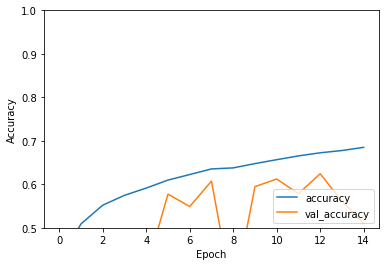

313/313 - 1s - loss: 1.9477 - accuracy: 0.5111
--------------------------------- 3 96 2 0.5110999941825867 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0532 - accuracy: 0.4021 - val_loss: 2.0459 - val_accuracy: 0.4093
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9806 - accuracy: 0.4753 - val_loss: 1.9715 - val_accuracy: 0.4845
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9504 - accuracy: 0.5065 - val_loss: 2.1400 - val_accuracy: 0.3157
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9310 - accuracy: 0.5271 - val_loss: 1.9423 - val_accuracy: 0.5150
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9147 - accuracy: 0.5431 - val_loss: 2.0477 - val_accuracy: 0.4099
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8993 - accuracy: 0.5583 - val_loss: 1.9657 - val_accuracy: 0.4908
E

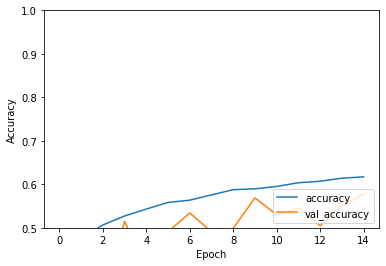

313/313 - 1s - loss: 1.8810 - accuracy: 0.5779
--------------------------------- 3 96 3 0.5778999924659729 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0253 - accuracy: 0.4295 - val_loss: 2.0864 - val_accuracy: 0.3695
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9382 - accuracy: 0.5192 - val_loss: 2.1177 - val_accuracy: 0.3373
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9049 - accuracy: 0.5520 - val_loss: 1.9371 - val_accuracy: 0.5213
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8780 - accuracy: 0.5789 - val_loss: 1.8914 - val_accuracy: 0.5671
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8574 - accuracy: 0.6011 - val_loss: 1.9396 - val_accuracy: 0.5197
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8397 - accuracy: 0.6193 - val_loss: 1.8795 - val_accuracy: 0.5770
E

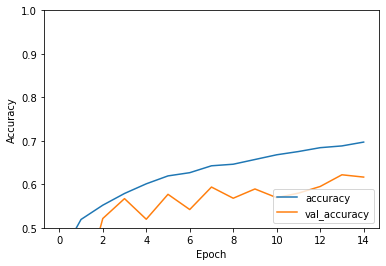

313/313 - 1s - loss: 1.8423 - accuracy: 0.6166
--------------------------------- 3 128 2 0.616599977016449 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0487 - accuracy: 0.4065 - val_loss: 2.0237 - val_accuracy: 0.4326
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9778 - accuracy: 0.4780 - val_loss: 2.0705 - val_accuracy: 0.3847
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9499 - accuracy: 0.5068 - val_loss: 2.1156 - val_accuracy: 0.3400
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9295 - accuracy: 0.5281 - val_loss: 1.9481 - val_accuracy: 0.5095
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9108 - accuracy: 0.5466 - val_loss: 1.9894 - val_accuracy: 0.4668
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8992 - accuracy: 0.5591 - val_loss: 1.9587 - val_accuracy: 0.4992
E

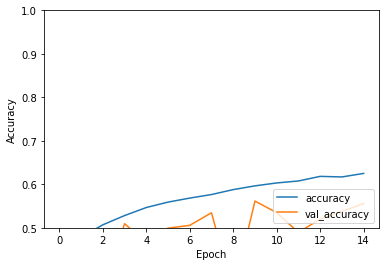

313/313 - 1s - loss: 1.9042 - accuracy: 0.5558
--------------------------------- 3 128 3 0.5558000206947327 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0259 - accuracy: 0.4289 - val_loss: 2.0329 - val_accuracy: 0.4215
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9380 - accuracy: 0.5195 - val_loss: 1.9432 - val_accuracy: 0.5147
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8951 - accuracy: 0.5631 - val_loss: 2.0001 - val_accuracy: 0.4567
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8669 - accuracy: 0.5912 - val_loss: 1.8732 - val_accuracy: 0.5838
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8467 - accuracy: 0.6119 - val_loss: 1.8633 - val_accuracy: 0.5954
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8297 - accuracy: 0.6293 - val_loss: 1.9499 - val_accuracy: 0.5082


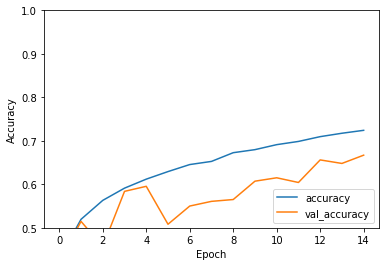

313/313 - 1s - loss: 1.7915 - accuracy: 0.6670
--------------------------------- 3 256 2 0.6669999957084656 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0493 - accuracy: 0.4057 - val_loss: 1.9871 - val_accuracy: 0.4676
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9788 - accuracy: 0.4775 - val_loss: 2.0876 - val_accuracy: 0.3669
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9450 - accuracy: 0.5120 - val_loss: 2.1144 - val_accuracy: 0.3418
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9237 - accuracy: 0.5341 - val_loss: 1.9858 - val_accuracy: 0.4714
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9108 - accuracy: 0.5464 - val_loss: 1.9741 - val_accuracy: 0.4814
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8942 - accuracy: 0.5642 - val_loss: 1.9320 - val_accuracy: 0.5261


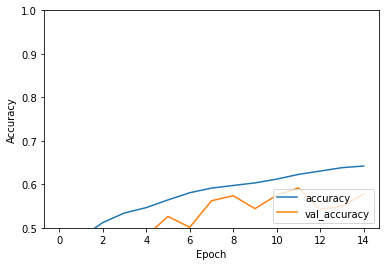

313/313 - 1s - loss: 1.8801 - accuracy: 0.5777
--------------------------------- 3 256 3 0.5777000188827515 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0492 - accuracy: 0.4057 - val_loss: 2.0384 - val_accuracy: 0.4161
Epoch 2/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9545 - accuracy: 0.5031 - val_loss: 2.0534 - val_accuracy: 0.4030
Epoch 3/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9062 - accuracy: 0.5509 - val_loss: 1.9652 - val_accuracy: 0.4916
Epoch 4/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8785 - accuracy: 0.5800 - val_loss: 1.9088 - val_accuracy: 0.5491
Epoch 5/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8597 - accuracy: 0.5986 - val_loss: 1.9620 - val_accuracy: 0.4942
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8411 - accuracy: 0.6178 - val_loss: 1.9386 - val_accuracy: 0.5185


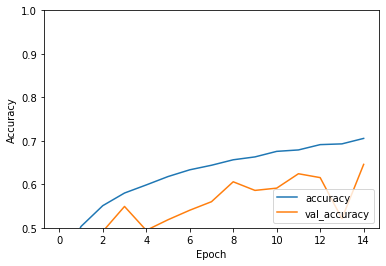

313/313 - 1s - loss: 1.8132 - accuracy: 0.6458
--------------------------------- 6 96 2 0.645799994468689 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0666 - accuracy: 0.3877 - val_loss: 2.2193 - val_accuracy: 0.2360
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9969 - accuracy: 0.4597 - val_loss: 2.0623 - val_accuracy: 0.3937
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9594 - accuracy: 0.4973 - val_loss: 1.9865 - val_accuracy: 0.4697
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9354 - accuracy: 0.5206 - val_loss: 2.0942 - val_accuracy: 0.3615
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9169 - accuracy: 0.5403 - val_loss: 1.9280 - val_accuracy: 0.5300
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9009 - accuracy: 0.5572 - val_loss: 1.9453 - val_accuracy: 0.5123
Ep

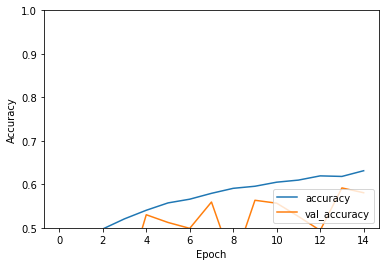

313/313 - 1s - loss: 1.8788 - accuracy: 0.5806
--------------------------------- 6 96 3 0.5806000232696533 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0490 - accuracy: 0.4047 - val_loss: 2.1714 - val_accuracy: 0.2829
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9590 - accuracy: 0.4976 - val_loss: 2.0684 - val_accuracy: 0.3895
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9057 - accuracy: 0.5521 - val_loss: 1.9935 - val_accuracy: 0.4631
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8759 - accuracy: 0.5827 - val_loss: 1.9435 - val_accuracy: 0.5134
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8573 - accuracy: 0.6012 - val_loss: 1.9124 - val_accuracy: 0.5450
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8393 - accuracy: 0.6193 - val_loss: 1.8736 - val_accuracy: 0.5849
E

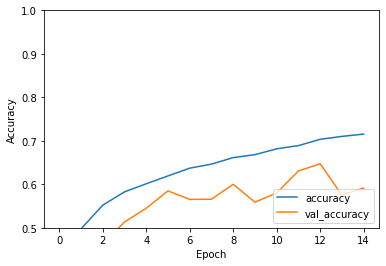

313/313 - 1s - loss: 1.8673 - accuracy: 0.5914
--------------------------------- 6 128 2 0.5914000272750854 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0637 - accuracy: 0.3899 - val_loss: 2.0664 - val_accuracy: 0.3899
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9915 - accuracy: 0.4646 - val_loss: 2.0171 - val_accuracy: 0.4377
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9544 - accuracy: 0.5017 - val_loss: 2.0062 - val_accuracy: 0.4511
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9304 - accuracy: 0.5271 - val_loss: 1.9832 - val_accuracy: 0.4753
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9164 - accuracy: 0.5411 - val_loss: 1.9267 - val_accuracy: 0.5309
Epoch 6/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8972 - accuracy: 0.5613 - val_loss: 2.0394 - val_accuracy: 0.4193


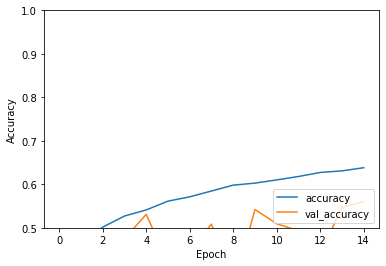

313/313 - 1s - loss: 1.8995 - accuracy: 0.5599
--------------------------------- 6 128 3 0.5598999857902527 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 14s 9ms/step - loss: 2.0464 - accuracy: 0.4094 - val_loss: 2.0637 - val_accuracy: 0.3916
Epoch 2/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.9543 - accuracy: 0.5019 - val_loss: 1.9504 - val_accuracy: 0.5060
Epoch 3/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.9046 - accuracy: 0.5530 - val_loss: 1.8956 - val_accuracy: 0.5616
Epoch 4/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8727 - accuracy: 0.5857 - val_loss: 1.9167 - val_accuracy: 0.5402
Epoch 5/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8505 - accuracy: 0.6077 - val_loss: 1.9732 - val_accuracy: 0.4821
Epoch 6/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8258 - accuracy: 0.6330 - val_loss: 1.8620 - val_accuracy: 0

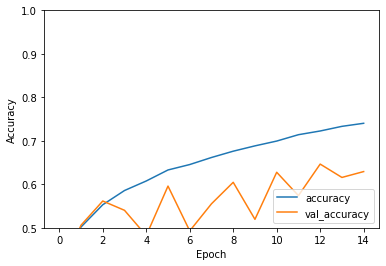

313/313 - 1s - loss: 1.8302 - accuracy: 0.6293
--------------------------------- 6 256 2 0.6292999982833862 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 13s 8ms/step - loss: 2.0639 - accuracy: 0.3896 - val_loss: 2.2255 - val_accuracy: 0.2301
Epoch 2/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.9957 - accuracy: 0.4604 - val_loss: 1.9936 - val_accuracy: 0.4625
Epoch 3/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.9656 - accuracy: 0.4903 - val_loss: 1.9703 - val_accuracy: 0.4867
Epoch 4/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.9409 - accuracy: 0.5166 - val_loss: 2.0244 - val_accuracy: 0.4303
Epoch 5/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.9180 - accuracy: 0.5400 - val_loss: 1.9574 - val_accuracy: 0.5001
Epoch 6/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8978 - accuracy: 0.5601 - val_loss: 1.9656 - val_accuracy: 0

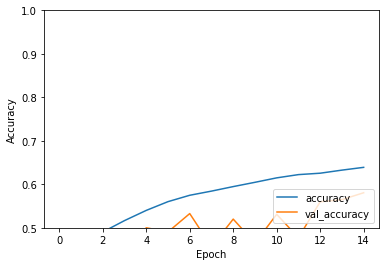

313/313 - 1s - loss: 1.8798 - accuracy: 0.5806
--------------------------------- 6 256 3 0.5806000232696533 ---------------------------


In [ ]:
meta = []
for ks in [3,6]:
    for f in [96,128,256]:
        for s in [2,3]:
            model = keras.Sequential([
                # keras.layers.Conv2D(kernel_size=6,filters=64,use_bias=False,padding='same',input_shape=(32,32,3)),
                # keras.layers.BatchNormalization(center=True,scale=False),
                # keras.layers.Activation('relu'),
                #keras.layers.Dropout(0.5),
                #keras.layers.MaxPool2D(),

                keras.layers.Conv2D(kernel_size=ks,filters=f,use_bias=False,padding='same',strides=s),
                keras.layers.BatchNormalization(center=True,scale=False),
                keras.layers.Activation('relu'),
                keras.layers.MaxPool2D(),
                
                keras.layers.Conv2D(kernel_size=ks,filters=f,use_bias=False,padding='same',strides=s),
                keras.layers.BatchNormalization(center=True,scale=False),
                keras.layers.Activation('relu'),
                keras.layers.MaxPool2D(),
                
                
                keras.layers.Conv2D(kernel_size=ks,filters=f,use_bias=False,padding='same',strides=s),
                keras.layers.BatchNormalization(center=True,scale=False),
                keras.layers.Activation('relu'),
                
                keras.layers.Flatten(),
                
                # keras.layers.Dense(128),
                # keras.layers.BatchNormalization(center=True,scale=False),
                # keras.layers.Activation('relu'),
                # keras.layers.Dropout(0.5),

                # keras.layers.Dense(200),
                # keras.layers.BatchNormalization(center=True,scale=False),
                # keras.layers.Activation('relu'),
                # keras.layers.Dropout(0.5),

                keras.layers.Dense(700),
                keras.layers.BatchNormalization(center=True,scale=False),
                keras.layers.Activation('relu'),
                keras.layers.Dropout(0.5),
                
                keras.layers.Dense(10, activation = tf.nn.softmax)    
            ])

            model.compile(optimizer=keras.optimizers.Adam(),
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                        metrics=['accuracy'])

            history = model.fit(train_images, train_labels, epochs=15, 
                                validation_data=(test_images, test_labels))

            plt.plot(history.history['accuracy'], label='accuracy')
            plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.ylim([0.5, 1])
            plt.legend(loc='lower right')
            plt.show()

            test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
            meta.append([ks,f,s,test_acc])
            print("---------------------------------",ks,f,s,test_acc,"---------------------------")

## Comparison Table

In [ ]:
meta

[[3, 96, 2, 0.5110999941825867],
 [3, 96, 3, 0.5778999924659729],
 [3, 128, 2, 0.616599977016449],
 [3, 128, 3, 0.5558000206947327],
 [3, 256, 2, 0.6669999957084656],
 [3, 256, 3, 0.5777000188827515],
 [6, 96, 2, 0.645799994468689],
 [6, 96, 3, 0.5806000232696533],
 [6, 128, 2, 0.5914000272750854],
 [6, 128, 3, 0.5598999857902527],
 [6, 256, 2, 0.6292999982833862],
 [6, 256, 3, 0.5806000232696533]]

In [ ]:
meta.sort(key = lambda k: k[3])

In [ ]:
meta

[[3, 96, 2, 0.5110999941825867],
 [3, 128, 3, 0.5558000206947327],
 [6, 128, 3, 0.5598999857902527],
 [3, 256, 3, 0.5777000188827515],
 [3, 96, 3, 0.5778999924659729],
 [6, 96, 3, 0.5806000232696533],
 [6, 256, 3, 0.5806000232696533],
 [6, 128, 2, 0.5914000272750854],
 [3, 128, 2, 0.616599977016449],
 [6, 256, 2, 0.6292999982833862],
 [6, 96, 2, 0.645799994468689],
 [3, 256, 2, 0.6669999957084656]]

3 strides always worse than 2 strides. No clear trend between 3 kernel size and 6 kernel size.


# For Loop #2

Epoch 1/15
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0287 - accuracy: 0.4254 - val_loss: 2.0601 - val_accuracy: 0.3941
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9320 - accuracy: 0.5250 - val_loss: 2.0377 - val_accuracy: 0.4195
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8917 - accuracy: 0.5666 - val_loss: 2.0896 - val_accuracy: 0.3651
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8629 - accuracy: 0.5957 - val_loss: 1.8774 - val_accuracy: 0.5823
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8407 - accuracy: 0.6178 - val_loss: 1.8663 - val_accuracy: 0.5927
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8226 - accuracy: 0.6358 - val_loss: 2.0709 - val_accuracy: 0.3872
Epoch 7/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8086 - accuracy: 0.6503 - val_loss: 1.8344 - val_accuracy:

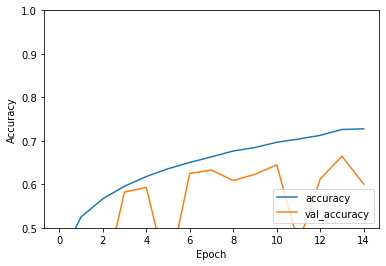

313/313 - 1s - loss: 1.8582 - accuracy: 0.6003
--------------------------------- 3 256 2 0.6003000140190125 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 14s 9ms/step - loss: 2.0317 - accuracy: 0.4237 - val_loss: 2.0634 - val_accuracy: 0.3893
Epoch 2/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.9434 - accuracy: 0.5133 - val_loss: 1.9760 - val_accuracy: 0.4811
Epoch 3/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8985 - accuracy: 0.5587 - val_loss: 2.0968 - val_accuracy: 0.3595
Epoch 4/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8678 - accuracy: 0.5905 - val_loss: 1.9098 - val_accuracy: 0.5486
Epoch 5/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8455 - accuracy: 0.6133 - val_loss: 1.9680 - val_accuracy: 0.4901
Epoch 6/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8257 - accuracy: 0.6332 - val_loss: 1.9409 - val_accuracy: 0

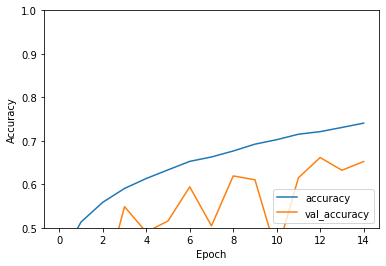

313/313 - 1s - loss: 1.8063 - accuracy: 0.6524
--------------------------------- 3 512 2 0.652400016784668 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 36s 23ms/step - loss: 2.0434 - accuracy: 0.4120 - val_loss: 2.1008 - val_accuracy: 0.3551
Epoch 2/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.9501 - accuracy: 0.5072 - val_loss: 1.9661 - val_accuracy: 0.4898
Epoch 3/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.9053 - accuracy: 0.5520 - val_loss: 1.8970 - val_accuracy: 0.5608
Epoch 4/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.8740 - accuracy: 0.5847 - val_loss: 1.9563 - val_accuracy: 0.5001
Epoch 5/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.8506 - accuracy: 0.6079 - val_loss: 2.0501 - val_accuracy: 0.4072
Epoch 6/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.8272 - accuracy: 0.6317 - val_loss: 1.8360 - val_accura

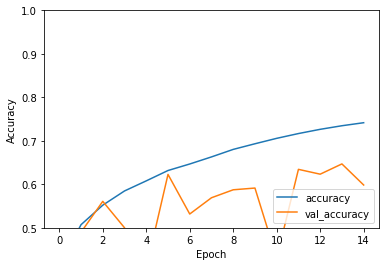

313/313 - 2s - loss: 1.8597 - accuracy: 0.5984
--------------------------------- 3 1024 2 0.5983999967575073 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 14s 9ms/step - loss: 2.0538 - accuracy: 0.3989 - val_loss: 2.0641 - val_accuracy: 0.3903
Epoch 2/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.9540 - accuracy: 0.5021 - val_loss: 1.9515 - val_accuracy: 0.5049
Epoch 3/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.9025 - accuracy: 0.5554 - val_loss: 2.0002 - val_accuracy: 0.4562
Epoch 4/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8673 - accuracy: 0.5914 - val_loss: 1.9604 - val_accuracy: 0.4956
Epoch 5/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8443 - accuracy: 0.6136 - val_loss: 1.9391 - val_accuracy: 0.5204
Epoch 6/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8276 - accuracy: 0.6316 - val_loss: 1.9170 - val_accuracy: 

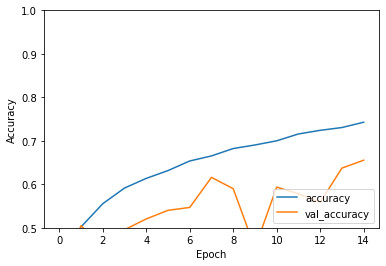

313/313 - 1s - loss: 1.8030 - accuracy: 0.6554
--------------------------------- 6 256 2 0.6553999781608582 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 40s 25ms/step - loss: 2.0481 - accuracy: 0.4062 - val_loss: 2.1506 - val_accuracy: 0.3061
Epoch 2/15
1563/1563 [==============================] - 39s 25ms/step - loss: 1.9542 - accuracy: 0.5018 - val_loss: 2.1710 - val_accuracy: 0.2840
Epoch 3/15
1563/1563 [==============================] - 39s 25ms/step - loss: 1.9065 - accuracy: 0.5519 - val_loss: 2.0789 - val_accuracy: 0.3762
Epoch 4/15
1563/1563 [==============================] - 40s 25ms/step - loss: 1.8757 - accuracy: 0.5827 - val_loss: 1.9462 - val_accuracy: 0.5116
Epoch 5/15
1563/1563 [==============================] - 39s 25ms/step - loss: 1.8479 - accuracy: 0.6116 - val_loss: 1.8949 - val_accuracy: 0.5624
Epoch 6/15
1563/1563 [==============================] - 39s 25ms/step - loss: 1.8337 - accuracy: 0.6247 - val_loss: 1.9182 - val_accur

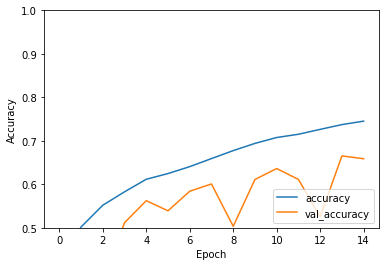

313/313 - 2s - loss: 1.8001 - accuracy: 0.6588
--------------------------------- 6 512 2 0.6588000059127808 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 157s 101ms/step - loss: 2.0600 - accuracy: 0.3937 - val_loss: 2.1273 - val_accuracy: 0.3263
Epoch 2/15
1563/1563 [==============================] - 157s 100ms/step - loss: 1.9640 - accuracy: 0.4923 - val_loss: 2.0358 - val_accuracy: 0.4219
Epoch 3/15
1563/1563 [==============================] - 158s 101ms/step - loss: 1.9160 - accuracy: 0.5409 - val_loss: 1.9445 - val_accuracy: 0.5147
Epoch 4/15
1563/1563 [==============================] - 157s 100ms/step - loss: 1.8823 - accuracy: 0.5762 - val_loss: 1.9296 - val_accuracy: 0.5286
Epoch 5/15
1563/1563 [==============================] - 157s 100ms/step - loss: 1.8559 - accuracy: 0.6026 - val_loss: 2.0179 - val_accuracy: 0.4396
Epoch 6/15
1563/1563 [==============================] - 157s 100ms/step - loss: 1.8331 - accuracy: 0.6252 - val_loss: 2.0510

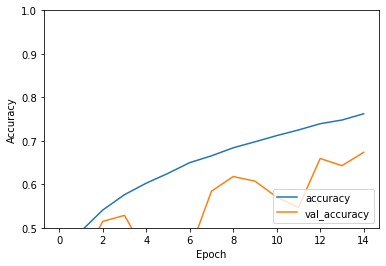

313/313 - 8s - loss: 1.7863 - accuracy: 0.6735
--------------------------------- 6 1024 2 0.6735000014305115 ---------------------------


In [ ]:
meta2 = []
for ks in [3,6]:
    for f in [256,512,1024]:
        for s in [2]:
            model = keras.Sequential([
                # keras.layers.Conv2D(kernel_size=6,filters=64,use_bias=False,padding='same',input_shape=(32,32,3)),
                # keras.layers.BatchNormalization(center=True,scale=False),
                # keras.layers.Activation('relu'),
                #keras.layers.Dropout(0.5),
                #keras.layers.MaxPool2D(),

                keras.layers.Conv2D(kernel_size=ks,filters=f,use_bias=False,padding='same',strides=s),
                keras.layers.BatchNormalization(center=True,scale=False),
                keras.layers.Activation('relu'),
                keras.layers.MaxPool2D(),
                
                keras.layers.Conv2D(kernel_size=ks,filters=f,use_bias=False,padding='same',strides=s),
                keras.layers.BatchNormalization(center=True,scale=False),
                keras.layers.Activation('relu'),
                keras.layers.MaxPool2D(),
                
                
                keras.layers.Conv2D(kernel_size=ks,filters=f,use_bias=False,padding='same',strides=s),
                keras.layers.BatchNormalization(center=True,scale=False),
                keras.layers.Activation('relu'),
                
                keras.layers.Flatten(),
                
                # keras.layers.Dense(128),
                # keras.layers.BatchNormalization(center=True,scale=False),
                # keras.layers.Activation('relu'),
                # keras.layers.Dropout(0.5),

                # keras.layers.Dense(200),
                # keras.layers.BatchNormalization(center=True,scale=False),
                # keras.layers.Activation('relu'),
                # keras.layers.Dropout(0.5),

                keras.layers.Dense(700),
                keras.layers.BatchNormalization(center=True,scale=False),
                keras.layers.Activation('relu'),
                keras.layers.Dropout(0.5),
                
                keras.layers.Dense(10, activation = tf.nn.softmax)    
            ])

            model.compile(optimizer=keras.optimizers.Adam(),
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                        metrics=['accuracy'])

            history = model.fit(train_images, train_labels, epochs=15, 
                                validation_data=(test_images, test_labels))

            plt.plot(history.history['accuracy'], label='accuracy')
            plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.ylim([0.5, 1])
            plt.legend(loc='lower right')
            plt.show()

            test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
            meta.append([ks,f,s,test_acc])
            print("---------------------------------",ks,f,s,test_acc,"---------------------------")

In [15]:
meta

[[3, 256, 2, 0.6003000140190125],
 [3, 512, 2, 0.652400016784668],
 [3, 1024, 2, 0.5983999967575073],
 [6, 256, 2, 0.6553999781608582],
 [6, 512, 2, 0.6588000059127808],
 [6, 1024, 2, 0.6735000014305115]]